### 타이타닉 생존자 ML 예측 구현
* #suvived lable


In [1]:
import pandas as pd
import numpy as np

1.	Titanic train 데이터 불러오기
2.	데이터 내용 확인
3.	EDA를 통해 데이터 전처리하기
4.	디시전트리를 이용해서 정확도 확인하기
5.  학습된 모델을 가지고 test 데이터 예측해보기
6.	피처 임포턴스 확인해보기


In [2]:
Titanic = pd.read_csv("./data/titanic_train.csv")

In [3]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
Titanic.drop(["Name", "SibSp", "Parch","Ticket","Fare"], axis = 1, inplace= True)
Titanic.drop("PassengerId", axis = 1, inplace= True)
Titanic.drop("Cabin", axis = 1, inplace= True)

In [5]:
Titanic_df = Titanic

In [6]:
Titanic_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [7]:
Titanic_df["Age"]= Titanic_df["Age"].fillna(Titanic_df["Age"].mean())

In [8]:
Titanic_df["Embarked"]=Titanic_df["Embarked"].fillna('S')

In [9]:
Titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [10]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [11]:
# Sex. Eebarked Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


In [12]:
Titanic_df["Embarked"]=encoder.fit_transform(Titanic["Embarked"])
Titanic_df["Sex"]=encoder.fit_transform(Titanic["Sex"])


In [13]:
Titanic_df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.000000,2
1,1,1,0,38.000000,0
2,1,3,0,26.000000,2
3,1,1,0,35.000000,2
4,0,3,1,35.000000,2
...,...,...,...,...,...
886,0,2,1,27.000000,2
887,1,1,0,19.000000,2
888,0,3,0,29.699118,2
889,1,1,1,26.000000,0


In [14]:
Titanic_df["lable"] = Titanic_df["Survived"]

In [15]:
Titanic_df.drop("Survived", axis = 1, inplace= True)

In [16]:
Titanic_df

,Pclass,Sex,Age,Embarked,lable
0,3,1,22.000000,2,0
1,1,0,38.000000,0,1
2,3,0,26.000000,2,1
3,1,0,35.000000,2,1
4,3,1,35.000000,2,0
...,...,...,...,...,...
886,2,1,27.000000,2,0
887,1,0,19.000000,2,1
888,3,0,29.699118,2,0
889,1,1,26.000000,0,1


In [17]:
Titanic_df["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Titanic_df.drop("lable",axis=1), Titanic_df["lable"], test_size=0.2, random_state=1)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test,dt_pred)

0.7597765363128491

In [20]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=156)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
accuracy_score(y_test,lr_pred)

0.7821229050279329

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.7597765363128491

In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":[2,3,5,10],'min_samples_split':[2,3,5], 
              'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring='accuracy',cv=5)
grid_dclf.fit(X_train, y_train)
print(grid_dclf.best_params_)
print(grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
accuracy


{'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.834295282182606


0.776536312849162

In [23]:
# 혼돈 행렬 구하기 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
 
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 :{0:.4f},정밀도 {1:.4f},재현율:{2:.4f}'.format(accuracy, precision,recall))
    print("f1스코어:{0:.4f}".format(f1))
          
    
    

# 오차행렬
### TN : 0이라고 예측하고 실제로도 0인경우
### FN : 0이라고 예측하고 실제로는 1인경우
### FP : 1이라고 예측하고 실제로는 0인경우
### TP : 1이라고 예측하고 실제로도 1인경우

#### 민감도(Sensitivity) =  TP /(TP+FN)
#### 특이도(Specificity) =  TN /(FP+TN)
#### 정밀도(Precision) = TP/(FP + TP)
#### 재현율(Recall) = TP/(FN + TP)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[89 17]
 [22 51]]
정확도 :0.7821,정밀도 0.7500,재현율:0.6986
f1스코어:0.7234


In [25]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(pred_proba.shape)

(179, 2)


In [26]:
pred.reshape(-1,1)

array([[1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [27]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
pred_proba_result

array([[0.15104497, 0.84895503, 1.        ],
       [0.92344916, 0.07655084, 0.        ],
       [0.16206834, 0.83793166, 1.        ],
       [0.42920431, 0.57079569, 1.        ],
       [0.11997724, 0.88002276, 1.        ],
       [0.89897878, 0.10102122, 0.        ],
       [0.82640232, 0.17359768, 0.        ],
       [0.10146296, 0.89853704, 1.        ],
       [0.3983065 , 0.6016935 , 1.        ],
       [0.42920431, 0.57079569, 1.        ],
       [0.91099296, 0.08900704, 0.        ],
       [0.45996113, 0.54003887, 1.        ],
       [0.73198151, 0.26801849, 0.        ],
       [0.78959666, 0.21040334, 0.        ],
       [0.42920431, 0.57079569, 1.        ],
       [0.52383402, 0.47616598, 0.        ],
       [0.85829845, 0.14170155, 0.        ],
       [0.90811615, 0.09188385, 0.        ],
       [0.93764454, 0.06235546, 0.        ],
       [0.1981163 , 0.8018837 , 1.        ],
       [0.92894721, 0.07105279, 0.        ],
       [0.86446228, 0.13553772, 0.        ],
       [0.

In [28]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)


오차 행렬
[[89 17]
 [22 51]]
정확도 :0.7821,정밀도 0.7500,재현율:0.6986
f1스코어:0.7234


In [29]:
custom_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[84 22]
 [14 59]]
정확도 :0.7989,정밀도 0.7284,재현율:0.8082
f1스코어:0.7662


In [30]:
pred_proba

array([[0.15104497, 0.84895503],
       [0.92344916, 0.07655084],
       [0.16206834, 0.83793166],
       [0.42920431, 0.57079569],
       [0.11997724, 0.88002276],
       [0.89897878, 0.10102122],
       [0.82640232, 0.17359768],
       [0.10146296, 0.89853704],
       [0.3983065 , 0.6016935 ],
       [0.42920431, 0.57079569],
       [0.91099296, 0.08900704],
       [0.45996113, 0.54003887],
       [0.73198151, 0.26801849],
       [0.78959666, 0.21040334],
       [0.42920431, 0.57079569],
       [0.52383402, 0.47616598],
       [0.85829845, 0.14170155],
       [0.90811615, 0.09188385],
       [0.93764454, 0.06235546],
       [0.1981163 , 0.8018837 ],
       [0.92894721, 0.07105279],
       [0.86446228, 0.13553772],
       [0.04420486, 0.95579514],
       [0.71368434, 0.28631566],
       [0.25528515, 0.74471485],
       [0.91650381, 0.08349619],
       [0.03997799, 0.96002201],
       [0.31678198, 0.68321802],
       [0.76729998, 0.23270002],
       [0.06687465, 0.93312535],
       [0.

In [31]:
thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[84 22]
 [14 59]]
정확도 :0.7989,정밀도 0.7284,재현율:0.8082
f1스코어:0.7662
임곗값: 0.45
오차 행렬
[[86 20]
 [16 57]]
정확도 :0.7989,정밀도 0.7403,재현율:0.7808
f1스코어:0.7600
임곗값: 0.5
오차 행렬
[[89 17]
 [22 51]]
정확도 :0.7821,정밀도 0.7500,재현율:0.6986
f1스코어:0.7234
임곗값: 0.55
오차 행렬
[[92 14]
 [27 46]]
정확도 :0.7709,정밀도 0.7667,재현율:0.6301
f1스코어:0.6917
임곗값: 0.6
오차 행렬
[[98  8]
 [34 39]]
정확도 :0.7654,정밀도 0.8298,재현율:0.5342
f1스코어:0.6500


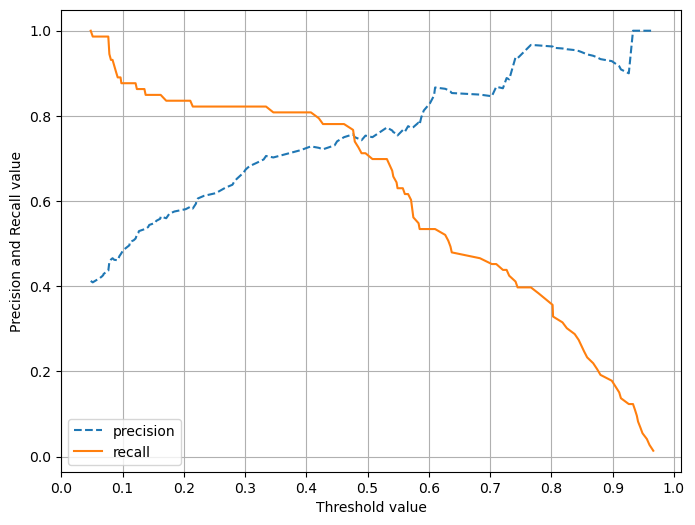

In [32]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions,recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))  
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])  

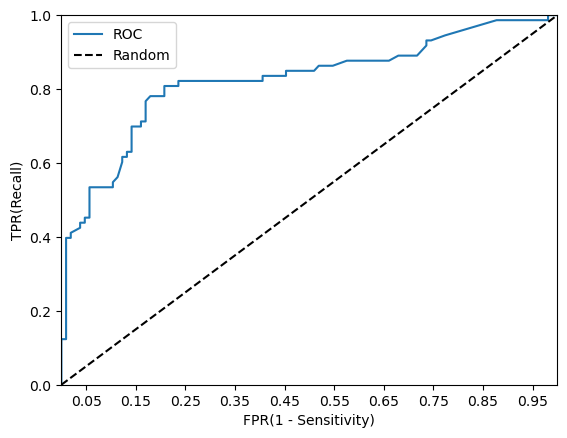

In [33]:
from sklearn.metrics import roc_curve


def roc_curve_plot(y_test, pred_proba_c1):
    
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0,1], 'k--', label="Random")
    
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
    

In [34]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8238


In [35]:
pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [37]:
from sklearn.preprocessing import StandardScaler

#StandarScaler 객체 생성
scaler = StandardScaler()
scaler.fit(Titanic_df)
Titanic_scaled = scaler.transform(Titanic_df)
Titanic_df_scaled = pd.DataFrame(data=Titanic_scaled, columns = Titanic_df.columns)

print('feature 들의 평균 값')
print(Titanic_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(Titanic_df_scaled.var())



feature 들의 평균 값
Pclass     -2.031048e-16
Sex        -4.059603e-16
Age         2.562796e-16
Embarked    1.556306e-16
lable      -2.287732e-16
dtype: float64

feature 들의 분산 값
Pclass      1.001124
Sex         1.001124
Age         1.001124
Embarked    1.001124
lable       1.001124
dtype: float64


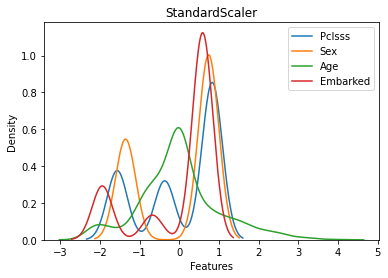

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(Titanic_df_scaled ['Pclass'])
sns.kdeplot(Titanic_df_scaled ['Sex'])
sns.kdeplot(Titanic_df_scaled ['Age'])
sns.kdeplot(Titanic_df_scaled ['Embarked'])
plt.title('StandardScaler')
plt.xlabel('Features')
plt.legend(['Pclsss', 'Sex', 'Age', 'Embarked'])
plt.show()
plt.show()


In [38]:
from sklearn.preprocessing import MinMaxScaler

#StandarScaler 객체 생성
scaler = MinMaxScaler()
scaler.fit(Titanic_df)
Titanic_scaled = scaler.transform(Titanic_df)
Titanic_df_scaled = pd.DataFrame(data=Titanic_scaled, columns = Titanic_df.columns)

print('feature 들의 최대 값')
print(Titanic_df_scaled.max())
print('\nfeature 들의 최소 값')
print(Titanic_df_scaled.min())

feature 들의 최대 값
Pclass      1.0
Sex         1.0
Age         1.0
Embarked    1.0
lable       1.0
dtype: float64

feature 들의 최소 값
Pclass      0.0
Sex         0.0
Age         0.0
Embarked    0.0
lable       0.0
dtype: float64


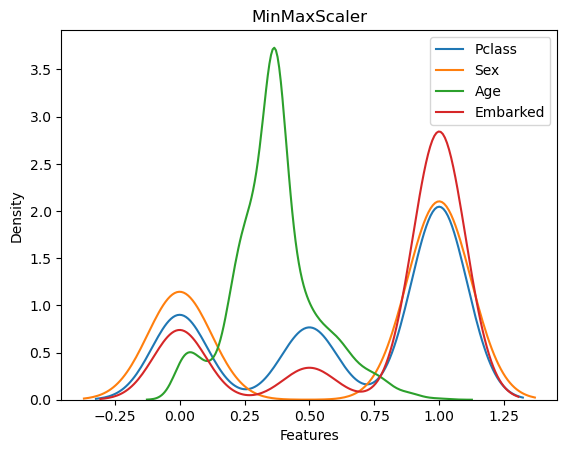

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(Titanic_df_scaled ['Pclass'])
sns.kdeplot(Titanic_df_scaled ['Sex'])
sns.kdeplot(Titanic_df_scaled ['Age'])
sns.kdeplot(Titanic_df_scaled ['Embarked'])
plt.title('MinMaxScaler')
plt.xlabel('Features')
plt.legend(['Pclass', 'Sex', 'Age', 'Embarked'])
plt.show()
plt.show()

In [40]:
Titanic_df.var()

Pclass        0.699015
Sex           0.228475
Age         169.052400
Embarked      0.626477
lable         0.236772
dtype: float64

In [41]:
from sklearn.preprocessing import RobustScaler
#  RobustScaler
# -> 평균과 분산대신, 중간값과 사분위 값을 조정
# ->아주 동 떨어진 데이터를 제거
# *이상치: 측정된 데이터 사이의 경향성을 지나치게 해치는 데이터 ex)측정 에러
scaler = RobustScaler()
scaler.fit(Titanic_df)
Titanic_scaled = scaler.transform(Titanic_df)
Titanic_df_scaled = pd.DataFrame(data=Titanic_scaled, columns = Titanic_df.columns)

print('feature 들의 평균 값')
print(Titanic_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(Titanic_df_scaled.var())

feature 들의 평균 값
Pclass     -6.913580e-01
Sex        -3.524130e-01
Age         1.996159e-16
Embarked   -4.635241e-01
lable       3.838384e-01
dtype: float64

feature 들의 분산 값
Pclass      0.699015
Sex         0.228475
Age         1.000310
Embarked    0.626477
lable       0.236772
dtype: float64


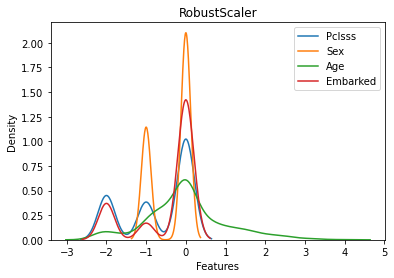

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(Titanic_df_scaled ['Pclass'])
sns.kdeplot(Titanic_df_scaled ['Sex'])
sns.kdeplot(Titanic_df_scaled ['Age'])
sns.kdeplot(Titanic_df_scaled ['Embarked'])
plt.title('RobustScaler')
plt.xlabel('Features')
plt.legend(['Pclsss', 'Sex', 'Age', 'Embarked'])
plt.show()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
data = ["Pclass", "Sex", "Age", "Embarked"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Titanic_df[data], Titanic_df["lable"], test_size=0.2, random_state=42)

NameError: name 'data' is not defined

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'male'

In [ ]:
tree.plot_tree(clf)
plt.show()

NameError: name 'tree' is not defined